# Web Scraping Project

## Top Rated Movies in the World

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
# Read the File

data=pd.read_csv("D:\\Datasets\\movie.csv") 

In [3]:
url='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=1'
page=requests.get(url)

In [4]:
page.status_code

200

In [5]:
content=page.text

In [6]:
soup=BeautifulSoup(content)

In [7]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDB Top 500+ - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls046196709/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls046196709/" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      u

In [9]:
type(page)
type(content)
type(soup)

requests.models.Response

str

bs4.BeautifulSoup

# 1.Data Scraping Process

In [10]:
# find all PageElements that match the given criteria

soup.find_all('div',attrs={'class':'lister-item-content'})

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>
 <p class="text-muted text-small">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">142 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Drama            </span>
 </p>
 <div class="ipl-rating-widget">
 <div class="ipl-rating-star small">
 <span class="ipl-rating-star__star">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 </span>
 <span class="ipl-rating-star__rating">9.3</span>
 </div>
 <div

In [11]:
# find the first PageElement that matches the given criteria

soup.find('div',attrs={'class':'lister-item-content'})

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted text-small">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">142 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">9.3</span>
</div>
<div class="ipl-rating-interac

In [12]:
# store the first movie details
x=soup.find('div',attrs={'class':'lister-item-content'})

In [13]:
x.text

'\n\n1.\nThe Shawshank Redemption\n(1994)\n\n\nA\n|\n142 min\n|\n\nDrama            \n\n\n\n\n\n\n\n\n\n\n9.3\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n1\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n2\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n3\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n4\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n5\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n6\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n7\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n8\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n9\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n10\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n\nError: please try again.\n\n\n\n\n\n\n\n\n81        \n        Metascore\n        \n\nTwo imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.\n\n    Director:\nFrank Darabont\n| \n    Stars:\nTim Robbins, \nMorgan Freeman, \nBob Gunton, \nWilliam Sa

In [14]:
title=[]
year=[]
certificate=[]
time=[]
genre=[]
ratings=[]
metascore=[]
votes=[]
gross=[]
pg_no=[]

for x in range(1,6):
    url='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page={}'.format(x)
    pagecontent=requests.get(url).text
    soup=BeautifulSoup(pagecontent)
    
    
    for i in soup.find_all('div',attrs={'class':'lister-item mode-detail'}):
        movie_name=i.h3.a.text
        title.append(movie_name)

        released_year=i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        year.append(released_year)

        cert_ficate=i.p.span.text
        certificate.append(cert_ficate)

        runtime= i.p.find('span',class_='runtime').text
        time.append(runtime)

        type_=i.p.find('span',class_='genre').text.replace('\n','').replace(' ','')
        genre.append(type_)

        rate=i.find('span',class_='ipl-rating-star__rating').text
        ratings.append(rate)

        meta=i.find('span',class_='metascore').text.replace(' ','') if i.find('span',class_='metascore') else 'NaN'
        metascore.append(meta)

        value=i.find_all('span',attrs={'name':'nv'})
        vote=value[0].text
        votes.append(vote)

        gross_count=value[1].text if len(value)>1 else 'NaN'
        gross.append(gross_count)
        

        
        pg_no.append(x)
    print('page number{}'.format(x))

page number1
page number2
page number3
page number4
page number5


In [15]:
movie_df=pd.DataFrame({'Title':title,
                      'Released_Year':year,
                      'Certificate':certificate,
                      'Movie_Duration':time,
                      'Genre':genre,
                      'Ratings':ratings,
                      'Metascore':metascore,
                      'Votes':votes,
                      'Gross':gross,
                      'Page_No.':pg_no})

In [16]:
movie_df

Title Released_Year Certificate  \
0                         The Shawshank Redemption          1994           A   
1                                    The Godfather          1972           A   
2                                  The Dark Knight          2008          UA   
3                            The Godfather Part II          1974           A   
4    The Lord of the Rings: The Return of the King          2003           U   
..                                             ...           ...         ...   
482                                         Freaks          1932      64 min   
483                                   Frankenstein          1931           A   
484                                   Mou gaan dou          2002          UA   
485                       The Manchurian Candidate          1962           A   
486                             The Man from Earth          2007      87 min   

    Movie_Duration                   Genre Ratings Metascore      Votes  \
0          142 min                   Drama     9.3        81  2,611,093   
1          175 min             Crime,Drama     9.2       100  1,806,749   
2          152 min      Action,Crime,Drama       9        84  2,583,156   
3          202 min             Crime,Drama       9        90  1,242,782   
4          201 min  Action,Adventure,Drama       9        94  1,792,340   
..             ...                     ...     ...       ...        ...   
482         64 min            Drama,Horror     7.9        80     46,172   
483         70 min     Drama,Horror,Sci-Fi     7.8        91     71,575   
484        101 min      Action,Crime,Drama       8        75    124,099   
485        126 min          Drama,Thriller     7.9        94     75,256   
486         87 min   Drama,Fantasy,Mystery     7.9       NaN    186,060   

        Gross  Page_No.  
0     $28.34M         1  
1    $134.97M         1  
2    $534.86M         1  
3     $57.30M         1  
4    $377.85M         1  
..        ...       ...  
482       NaN         5  
483       NaN         5  
484    $0.17M         5  
485       NaN         5  
486       NaN         5  

[487 rows x 10 columns]

In [17]:
#save to csv

movie_df.to_csv(r'D:\Datasets\movie.csv')

# 2. Data Cleaning Process

In [18]:
# Reading the .csv File

data=pd.read_csv("D:\\Datasets\\movie.csv") 

In [19]:
# Counting the individual certificate items 

for x,y in data["Certificate"].value_counts().items():
    print(x,y)

U 147
A 120
UA 81
R 29
PG-13 7
96 min 5
110 min 5
18 5
PG 5
94 min 5
87 min 3
100 min 3
107 min 3
105 min 3
Not Rated 3
125 min 3
102 min 2
75 min 2
113 min 2
95 min 2
130 min 2
108 min 2
170 min 2
16 2
92 min 2
7 2
G 2
128 min 2
138 min 2
117 min 2
112 min 2
67 min 1
104 min 1
141 min 1
84 min 1
120 min 1
114 min 1
97 min 1
101 min 1
88 min 1
118 min 1
69 min 1
13 1
123 min 1
91 min 1
76 min 1
82 min 1
45 min 1
129 min 1
15+ 1
139 min 1
121 min 1
85 min 1
158 min 1
153 min 1
68 min 1
196 min 1
205 min 1
115 min 1
126 min 1
64 min 1


In [20]:
# extract content

l=[]
for x,y in data["Certificate"].value_counts().items():
    if y<=5 and x!='PG'and x!='G':
        l.append(x)
(l)

['96 min',
 '110 min',
 '18',
 '94 min',
 '87 min',
 '100 min',
 '107 min',
 '105 min',
 'Not Rated',
 '125 min',
 '102 min',
 '75 min',
 '113 min',
 '95 min',
 '130 min',
 '108 min',
 '170 min',
 '16',
 '92 min',
 '7',
 '128 min',
 '138 min',
 '117 min',
 '112 min',
 '67 min',
 '104 min',
 '141 min',
 '84 min',
 '120 min',
 '114 min',
 '97 min',
 '101 min',
 '88 min',
 '118 min',
 '69 min',
 '13',
 '123 min',
 '91 min',
 '76 min',
 '82 min',
 '45 min',
 '129 min',
 '15+',
 '139 min',
 '121 min',
 '85 min',
 '158 min',
 '153 min',
 '68 min',
 '196 min',
 '205 min',
 '115 min',
 '126 min',
 '64 min']

In [21]:
# Replacing with Nan

z=data['Certificate'].replace(l,np.nan)
data['Certificate']=z
data['Certificate']

0        A
1        A
2       UA
3        A
4        U
      ... 
482    NaN
483      A
484     UA
485      A
486    NaN
Name: Certificate, Length: 487, dtype: object

In [22]:
## replacing null values to NR

data['Gross'].fillna('NR',inplace=True)
data

Unnamed: 0                                          Title Released_Year  \
0             0                       The Shawshank Redemption          1994   
1             1                                  The Godfather          1972   
2             2                                The Dark Knight          2008   
3             3                          The Godfather Part II          1974   
4             4  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
482         482                                         Freaks          1932   
483         483                                   Frankenstein          1931   
484         484                                   Mou gaan dou          2002   
485         485                       The Manchurian Candidate          1962   
486         486                             The Man from Earth          2007   

    Certificate Movie_Duration                   Genre  Ratings  Metascore  \
0             A        142 min                   Drama      9.3       81.0   
1             A        175 min             Crime,Drama      9.2      100.0   
2            UA        152 min      Action,Crime,Drama      9.0       84.0   
3             A        202 min             Crime,Drama      9.0       90.0   
4             U        201 min  Action,Adventure,Drama      9.0       94.0   
..          ...            ...                     ...      ...        ...   
482         NaN         64 min            Drama,Horror      7.9       80.0   
483           A         70 min     Drama,Horror,Sci-Fi      7.8       91.0   
484          UA        101 min      Action,Crime,Drama      8.0       75.0   
485           A        126 min          Drama,Thriller      7.9       94.0   
486         NaN         87 min   Drama,Fantasy,Mystery      7.9        NaN   

         Votes     Gross  Page_No.  
0    2,611,093   $28.34M         1  
1    1,806,749  $134.97M         1  
2    2,583,156  $534.86M         1  
3    1,242,782   $57.30M         1  
4    1,792,340  $377.85M         1  
..         ...       ...       ...  
482     46,172        NR         5  
483     71,575        NR         5  
484    124,099    $0.17M         5  
485     75,256        NR         5  
486    186,060        NR         5  

[487 rows x 11 columns]

In [23]:
# replacing $ with space in Gross

y=data['Gross'].apply(lambda x:x.replace("$","")) 

In [24]:
data['Gross']=y

In [25]:
# replacing M with space in Gross
    
r=data['Gross'].apply(lambda x:x.replace("M","")) 

In [26]:
data['Gross']=r

In [27]:
data

Unnamed: 0                                          Title Released_Year  \
0             0                       The Shawshank Redemption          1994   
1             1                                  The Godfather          1972   
2             2                                The Dark Knight          2008   
3             3                          The Godfather Part II          1974   
4             4  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
482         482                                         Freaks          1932   
483         483                                   Frankenstein          1931   
484         484                                   Mou gaan dou          2002   
485         485                       The Manchurian Candidate          1962   
486         486                             The Man from Earth          2007   

    Certificate Movie_Duration                   Genre  Ratings  Metascore  \
0             A        142 min                   Drama      9.3       81.0   
1             A        175 min             Crime,Drama      9.2      100.0   
2            UA        152 min      Action,Crime,Drama      9.0       84.0   
3             A        202 min             Crime,Drama      9.0       90.0   
4             U        201 min  Action,Adventure,Drama      9.0       94.0   
..          ...            ...                     ...      ...        ...   
482         NaN         64 min            Drama,Horror      7.9       80.0   
483           A         70 min     Drama,Horror,Sci-Fi      7.8       91.0   
484          UA        101 min      Action,Crime,Drama      8.0       75.0   
485           A        126 min          Drama,Thriller      7.9       94.0   
486         NaN         87 min   Drama,Fantasy,Mystery      7.9        NaN   

         Votes   Gross  Page_No.  
0    2,611,093   28.34         1  
1    1,806,749  134.97         1  
2    2,583,156  534.86         1  
3    1,242,782   57.30         1  
4    1,792,340  377.85         1  
..         ...     ...       ...  
482     46,172      NR         5  
483     71,575      NR         5  
484    124,099    0.17         5  
485     75,256      NR         5  
486    186,060      NR         5  

[487 rows x 11 columns]

In [28]:
## replacing commas with nothing in Votes

data['Votes'] = data['Votes'].astype(str)
a=data['Votes'].str.replace(',', '', regex=False).astype(int)

In [29]:
data['Votes']=a

In [30]:
data

Unnamed: 0                                          Title Released_Year  \
0             0                       The Shawshank Redemption          1994   
1             1                                  The Godfather          1972   
2             2                                The Dark Knight          2008   
3             3                          The Godfather Part II          1974   
4             4  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
482         482                                         Freaks          1932   
483         483                                   Frankenstein          1931   
484         484                                   Mou gaan dou          2002   
485         485                       The Manchurian Candidate          1962   
486         486                             The Man from Earth          2007   

    Certificate Movie_Duration                   Genre  Ratings  Metascore  \
0             A        142 min                   Drama      9.3       81.0   
1             A        175 min             Crime,Drama      9.2      100.0   
2            UA        152 min      Action,Crime,Drama      9.0       84.0   
3             A        202 min             Crime,Drama      9.0       90.0   
4             U        201 min  Action,Adventure,Drama      9.0       94.0   
..          ...            ...                     ...      ...        ...   
482         NaN         64 min            Drama,Horror      7.9       80.0   
483           A         70 min     Drama,Horror,Sci-Fi      7.8       91.0   
484          UA        101 min      Action,Crime,Drama      8.0       75.0   
485           A        126 min          Drama,Thriller      7.9       94.0   
486         NaN         87 min   Drama,Fantasy,Mystery      7.9        NaN   

       Votes   Gross  Page_No.  
0    2611093   28.34         1  
1    1806749  134.97         1  
2    2583156  534.86         1  
3    1242782   57.30         1  
4    1792340  377.85         1  
..       ...     ...       ...  
482    46172      NR         5  
483    71575      NR         5  
484   124099    0.17         5  
485    75256      NR         5  
486   186060      NR         5  

[487 rows x 11 columns]

In [31]:
## Adding extra columns

data[['Time','Duration']]=data['Movie_Duration'].str.split(' ',expand=True)

In [32]:
data.drop(['Movie_Duration','Duration','Unnamed: 0'],axis=1,inplace=True)

In [33]:
data

Title Released_Year Certificate  \
0                         The Shawshank Redemption          1994           A   
1                                    The Godfather          1972           A   
2                                  The Dark Knight          2008          UA   
3                            The Godfather Part II          1974           A   
4    The Lord of the Rings: The Return of the King          2003           U   
..                                             ...           ...         ...   
482                                         Freaks          1932         NaN   
483                                   Frankenstein          1931           A   
484                                   Mou gaan dou          2002          UA   
485                       The Manchurian Candidate          1962           A   
486                             The Man from Earth          2007         NaN   

                      Genre  Ratings  Metascore    Votes   Gross  Page_No.  \
0                     Drama      9.3       81.0  2611093   28.34         1   
1               Crime,Drama      9.2      100.0  1806749  134.97         1   
2        Action,Crime,Drama      9.0       84.0  2583156  534.86         1   
3               Crime,Drama      9.0       90.0  1242782   57.30         1   
4    Action,Adventure,Drama      9.0       94.0  1792340  377.85         1   
..                      ...      ...        ...      ...     ...       ...   
482            Drama,Horror      7.9       80.0    46172      NR         5   
483     Drama,Horror,Sci-Fi      7.8       91.0    71575      NR         5   
484      Action,Crime,Drama      8.0       75.0   124099    0.17         5   
485          Drama,Thriller      7.9       94.0    75256      NR         5   
486   Drama,Fantasy,Mystery      7.9        NaN   186060      NR         5   

    Time  
0    142  
1    175  
2    152  
3    202  
4    201  
..   ...  
482   64  
483   70  
484  101  
485  126  
486   87  

[487 rows x 10 columns]

In [34]:
data.columns

Index(['Title', 'Released_Year', 'Certificate', 'Genre', 'Ratings',
       'Metascore', 'Votes', 'Gross', 'Page_No.', 'Time'],
      dtype='object')

In [35]:
#creating sorted and final DataFrame 

final_df=data[['Title','Released_Year','Time','Certificate','Genre','Ratings','Metascore','Votes','Gross','Page_No.']]

In [36]:
final_df

Title Released_Year Time  \
0                         The Shawshank Redemption          1994  142   
1                                    The Godfather          1972  175   
2                                  The Dark Knight          2008  152   
3                            The Godfather Part II          1974  202   
4    The Lord of the Rings: The Return of the King          2003  201   
..                                             ...           ...  ...   
482                                         Freaks          1932   64   
483                                   Frankenstein          1931   70   
484                                   Mou gaan dou          2002  101   
485                       The Manchurian Candidate          1962  126   
486                             The Man from Earth          2007   87   

    Certificate                   Genre  Ratings  Metascore    Votes   Gross  \
0             A                   Drama      9.3       81.0  2611093   28.34   
1             A             Crime,Drama      9.2      100.0  1806749  134.97   
2            UA      Action,Crime,Drama      9.0       84.0  2583156  534.86   
3             A             Crime,Drama      9.0       90.0  1242782   57.30   
4             U  Action,Adventure,Drama      9.0       94.0  1792340  377.85   
..          ...                     ...      ...        ...      ...     ...   
482         NaN            Drama,Horror      7.9       80.0    46172      NR   
483           A     Drama,Horror,Sci-Fi      7.8       91.0    71575      NR   
484          UA      Action,Crime,Drama      8.0       75.0   124099    0.17   
485           A          Drama,Thriller      7.9       94.0    75256      NR   
486         NaN   Drama,Fantasy,Mystery      7.9        NaN   186060      NR   

     Page_No.  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
482         5  
483         5  
484         5  
485         5  
486         5  

[487 rows x 10 columns]

In [37]:
# Save the final df to a csv file & excel file

final_df.to_csv(r'D:\Datasets\top_movies.csv')
final_df.to_excel(r'D:\Datasets\top_moviess.xlsx')

### 1. Checking Duplicate Rows

In [38]:
# Checking Duplicate Values

final_df.duplicated().value_counts()

False    487
dtype: int64

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    object 
 2   Time           487 non-null    object 
 3   Certificate    391 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      434 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    object 
 9   Page_No.       487 non-null    int64  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 36.3+ KB


In [40]:
final_df['Gross'].value_counts()

NR        73
4.36       5
0.17       4
0.01       4
0.06       4
          ..
32.87      1
4.14       1
83.01      1
197.17     1
10.00      1
Name: Gross, Length: 386, dtype: int64

In [41]:
final_df = final_df.replace('NR', np.nan)

In [42]:
final_df['Gross'].value_counts()

4.36      5
0.01      4
0.06      4
0.17      4
0.10      3
         ..
32.87     1
4.14      1
83.01     1
197.17    1
10.00     1
Name: Gross, Length: 385, dtype: int64

### 2. Handling Missing Values

In [43]:
# checking for null values

final_df.isna() 

Title  Released_Year   Time  Certificate  Genre  Ratings  Metascore  \
0    False          False  False        False  False    False      False   
1    False          False  False        False  False    False      False   
2    False          False  False        False  False    False      False   
3    False          False  False        False  False    False      False   
4    False          False  False        False  False    False      False   
..     ...            ...    ...          ...    ...      ...        ...   
482  False          False  False         True  False    False      False   
483  False          False  False        False  False    False      False   
484  False          False  False        False  False    False      False   
485  False          False  False        False  False    False      False   
486  False          False  False         True  False    False       True   

     Votes  Gross  Page_No.  
0    False  False     False  
1    False  False     False  
2    False  False     False  
3    False  False     False  
4    False  False     False  
..     ...    ...       ...  
482  False   True     False  
483  False   True     False  
484  False  False     False  
485  False   True     False  
486  False   True     False  

[487 rows x 10 columns]

In [44]:
 # Calculating number of null Values

final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate      96
Genre             0
Ratings           0
Metascore        53
Votes             0
Gross            73
Page_No.          0
dtype: int64

In [45]:
np.sum(final_df.isna().sum())

222

In [46]:
final_df.Released_Year.head(177)

0        1994
1        1972
2        2008
3        1974
4        2003
        ...  
172      2014
173      2016
174      2013
175      2014
176    I 2013
Name: Released_Year, Length: 177, dtype: object

In [47]:
# removing unwanted value from column

final_df['Released_Year']=final_df['Released_Year'].str.replace('I','')

In [48]:
final_df.Released_Year.head(177)

0       1994
1       1972
2       2008
3       1974
4       2003
       ...  
172     2014
173     2016
174     2013
175     2014
176     2013
Name: Released_Year, Length: 177, dtype: object

In [49]:
final_df

Title Released_Year Time  \
0                         The Shawshank Redemption          1994  142   
1                                    The Godfather          1972  175   
2                                  The Dark Knight          2008  152   
3                            The Godfather Part II          1974  202   
4    The Lord of the Rings: The Return of the King          2003  201   
..                                             ...           ...  ...   
482                                         Freaks          1932   64   
483                                   Frankenstein          1931   70   
484                                   Mou gaan dou          2002  101   
485                       The Manchurian Candidate          1962  126   
486                             The Man from Earth          2007   87   

    Certificate                   Genre  Ratings  Metascore    Votes   Gross  \
0             A                   Drama      9.3       81.0  2611093   28.34   
1             A             Crime,Drama      9.2      100.0  1806749  134.97   
2            UA      Action,Crime,Drama      9.0       84.0  2583156  534.86   
3             A             Crime,Drama      9.0       90.0  1242782   57.30   
4             U  Action,Adventure,Drama      9.0       94.0  1792340  377.85   
..          ...                     ...      ...        ...      ...     ...   
482         NaN            Drama,Horror      7.9       80.0    46172     NaN   
483           A     Drama,Horror,Sci-Fi      7.8       91.0    71575     NaN   
484          UA      Action,Crime,Drama      8.0       75.0   124099    0.17   
485           A          Drama,Thriller      7.9       94.0    75256     NaN   
486         NaN   Drama,Fantasy,Mystery      7.9        NaN   186060     NaN   

     Page_No.  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
482         5  
483         5  
484         5  
485         5  
486         5  

[487 rows x 10 columns]

### Get the Missing values for each column

In [50]:
final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate      96
Genre             0
Ratings           0
Metascore        53
Votes             0
Gross            73
Page_No.          0
dtype: int64

In [51]:
np.round((final_df.isna().sum()/len(final_df))*100,2).astype(str)+'%'

Title              0.0%
Released_Year      0.0%
Time               0.0%
Certificate      19.71%
Genre              0.0%
Ratings            0.0%
Metascore        10.88%
Votes              0.0%
Gross            14.99%
Page_No.           0.0%
dtype: object

In [52]:
np.sum(final_df.isna().sum())

final_df.shape

np.round(np.sum(final_df.isna().sum()/len(final_df))*100,2).astype(str)+'%'

222

(487, 10)

'45.59%'

### Replace Missing Values with mean or median

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    object 
 2   Time           487 non-null    object 
 3   Certificate    391 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      434 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          414 non-null    object 
 9   Page_No.       487 non-null    int64  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 36.3+ KB


In [54]:
final_df.select_dtypes(include=np.number) # to select numeric columns
final_df.select_dtypes(include=np.object) # to select object columns

Ratings  Metascore    Votes  Page_No.
0        9.3       81.0  2611093         1
1        9.2      100.0  1806749         1
2        9.0       84.0  2583156         1
3        9.0       90.0  1242782         1
4        9.0       94.0  1792340         1
..       ...        ...      ...       ...
482      7.9       80.0    46172         5
483      7.8       91.0    71575         5
484      8.0       75.0   124099         5
485      7.9       94.0    75256         5
486      7.9        NaN   186060         5

[487 rows x 4 columns]

Title Released_Year Time  \
0                         The Shawshank Redemption          1994  142   
1                                    The Godfather          1972  175   
2                                  The Dark Knight          2008  152   
3                            The Godfather Part II          1974  202   
4    The Lord of the Rings: The Return of the King          2003  201   
..                                             ...           ...  ...   
482                                         Freaks          1932   64   
483                                   Frankenstein          1931   70   
484                                   Mou gaan dou          2002  101   
485                       The Manchurian Candidate          1962  126   
486                             The Man from Earth          2007   87   

    Certificate                   Genre   Gross  
0             A                   Drama   28.34  
1             A             Crime,Drama  134.97  
2            UA      Action,Crime,Drama  534.86  
3             A             Crime,Drama   57.30  
4             U  Action,Adventure,Drama  377.85  
..          ...                     ...     ...  
482         NaN            Drama,Horror     NaN  
483           A     Drama,Horror,Sci-Fi     NaN  
484          UA      Action,Crime,Drama    0.17  
485           A          Drama,Thriller     NaN  
486         NaN   Drama,Fantasy,Mystery     NaN  

[487 rows x 6 columns]

In [55]:
final_df_numeric=final_df.select_dtypes(include=np.number)

In [56]:
final_df_numeric.isna().sum()

Ratings       0
Metascore    53
Votes         0
Page_No.      0
dtype: int64

In [57]:
final_df_numeric.mean()
final_df_numeric.median()

Ratings           8.105339
Metascore        81.841014
Votes        418709.349076
Page_No.          2.946612
dtype: float64

Ratings           8.1
Metascore        84.0
Votes        229712.0
Page_No.          3.0
dtype: float64

In [58]:
final_df_numeric[final_df_numeric.Metascore.isna()].index

Int64Index([ 14,  54,  62,  73,  75,  88, 111, 114, 116, 141, 147, 156, 161,
            162, 163, 164, 165, 166, 186, 189, 190, 204, 219, 236, 238, 246,
            250, 251, 257, 259, 261, 265, 266, 267, 268, 271, 277, 280, 350,
            376, 378, 380, 381, 382, 384, 388, 391, 444, 463, 471, 472, 474,
            486],
           dtype='int64')

In [59]:
final_df_numeric.Metascore.fillna(final_df_numeric.Metascore.mean())[[14,  54,  62,  73,  75,  88, 111, 114, 116, 141, 147, 156, 161,
            162, 163, 164, 165, 166, 186, 189, 190, 204, 219, 236, 238, 246,
            250, 251, 257, 259, 261, 265, 266, 267, 268, 271, 277, 280, 350,
            376, 378, 380, 381, 382, 384, 388, 391, 444, 463, 471, 472, 474,
            486]]

final_df_numeric.Metascore.fillna(final_df_numeric.Metascore.median())[[14,  54,  62,  73,  75,  88, 111, 114, 116, 141, 147, 156, 161,
            162, 163, 164, 165, 166, 186, 189, 190, 204, 219, 236, 238, 246,
            250, 251, 257, 259, 261, 265, 266, 267, 268, 271, 277, 280, 350,
            376, 378, 380, 381, 382, 384, 388, 391, 444, 463, 471, 472, 474,
            486]]

14     81.841014
54     81.841014
62     81.841014
73     81.841014
75     81.841014
88     81.841014
111    81.841014
114    81.841014
116    81.841014
141    81.841014
147    81.841014
156    81.841014
161    81.841014
162    81.841014
163    81.841014
164    81.841014
165    81.841014
166    81.841014
186    81.841014
189    81.841014
190    81.841014
204    81.841014
219    81.841014
236    81.841014
238    81.841014
246    81.841014
250    81.841014
251    81.841014
257    81.841014
259    81.841014
261    81.841014
265    81.841014
266    81.841014
267    81.841014
268    81.841014
271    81.841014
277    81.841014
280    81.841014
350    81.841014
376    81.841014
378    81.841014
380    81.841014
381    81.841014
382    81.841014
384    81.841014
388    81.841014
391    81.841014
444    81.841014
463    81.841014
471    81.841014
472    81.841014
474    81.841014
486    81.841014
Name: Metascore, dtype: float64

14     84.0
54     84.0
62     84.0
73     84.0
75     84.0
88     84.0
111    84.0
114    84.0
116    84.0
141    84.0
147    84.0
156    84.0
161    84.0
162    84.0
163    84.0
164    84.0
165    84.0
166    84.0
186    84.0
189    84.0
190    84.0
204    84.0
219    84.0
236    84.0
238    84.0
246    84.0
250    84.0
251    84.0
257    84.0
259    84.0
261    84.0
265    84.0
266    84.0
267    84.0
268    84.0
271    84.0
277    84.0
280    84.0
350    84.0
376    84.0
378    84.0
380    84.0
381    84.0
382    84.0
384    84.0
388    84.0
391    84.0
444    84.0
463    84.0
471    84.0
472    84.0
474    84.0
486    84.0
Name: Metascore, dtype: float64

In [60]:
final_df[final_df_numeric.columns].fillna(final_df.mean())

Ratings   Metascore    Votes  Page_No.
0        9.3   81.000000  2611093         1
1        9.2  100.000000  1806749         1
2        9.0   84.000000  2583156         1
3        9.0   90.000000  1242782         1
4        9.0   94.000000  1792340         1
..       ...         ...      ...       ...
482      7.9   80.000000    46172         5
483      7.8   91.000000    71575         5
484      8.0   75.000000   124099         5
485      7.9   94.000000    75256         5
486      7.9   81.841014   186060         5

[487 rows x 4 columns]

In [61]:
final_df.Metascore.fillna(final_df.Metascore.mean(),inplace=True)

In [62]:
## Replacing the Null VAlues With Mode

final_df['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [63]:
final_df.Certificate.fillna(final_df.Certificate.mode()[0],inplace=True)

In [64]:
final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate       0
Genre             0
Ratings           0
Metascore         0
Votes             0
Gross            73
Page_No.          0
dtype: int64

In [65]:
final_df.Gross=final_df.Gross.astype(float)

In [66]:
## REplacing the null Values with Mode

final_df['Gross'].mean()

73.46335748792278

In [67]:
final_df.Gross.fillna(final_df.Gross.mode()[0],inplace=True)

In [68]:
final_df.isna().sum()

Title            0
Released_Year    0
Time             0
Certificate      0
Genre            0
Ratings          0
Metascore        0
Votes            0
Gross            0
Page_No.         0
dtype: int64

In [69]:
final_df

Title Released_Year Time  \
0                         The Shawshank Redemption          1994  142   
1                                    The Godfather          1972  175   
2                                  The Dark Knight          2008  152   
3                            The Godfather Part II          1974  202   
4    The Lord of the Rings: The Return of the King          2003  201   
..                                             ...           ...  ...   
482                                         Freaks          1932   64   
483                                   Frankenstein          1931   70   
484                                   Mou gaan dou          2002  101   
485                       The Manchurian Candidate          1962  126   
486                             The Man from Earth          2007   87   

    Certificate                   Genre  Ratings   Metascore    Votes   Gross  \
0             A                   Drama      9.3   81.000000  2611093   28.34   
1             A             Crime,Drama      9.2  100.000000  1806749  134.97   
2            UA      Action,Crime,Drama      9.0   84.000000  2583156  534.86   
3             A             Crime,Drama      9.0   90.000000  1242782   57.30   
4             U  Action,Adventure,Drama      9.0   94.000000  1792340  377.85   
..          ...                     ...      ...         ...      ...     ...   
482           U            Drama,Horror      7.9   80.000000    46172    4.36   
483           A     Drama,Horror,Sci-Fi      7.8   91.000000    71575    4.36   
484          UA      Action,Crime,Drama      8.0   75.000000   124099    0.17   
485           A          Drama,Thriller      7.9   94.000000    75256    4.36   
486           U   Drama,Fantasy,Mystery      7.9   81.841014   186060    4.36   

     Page_No.  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
482         5  
483         5  
484         5  
485         5  
486         5  

[487 rows x 10 columns]

In [70]:
final_df.Released_Year=final_df.Released_Year.astype(int)

In [71]:
final_df.Time=final_df.Time.astype(int)

In [72]:
final_df.sort_values(by='Votes',ascending=False,inplace=True)
final_df=final_df.reset_index()

In [73]:
final_df.drop('index',axis=1,inplace=True)

In [74]:
final_df

Title  Released_Year  Time Certificate  \
0    The Shawshank Redemption           1994   142           A   
1             The Dark Knight           2008   152          UA   
2                   Inception           2010   148          UA   
3                  Fight Club           1999   139           A   
4                Forrest Gump           1994   142          UA   
..                        ...            ...   ...         ...   
482        Once Were Warriors           1994   102           A   
483        Viskningar och rop           1972    91           A   
484     Nefes: Vatan Sagolsun           2009   128           U   
485      A Night at the Opera           1935    96           U   
486        The Lion in Winter           1968   134           U   

                       Genre  Ratings  Metascore    Votes   Gross  Page_No.  
0                      Drama      9.3  81.000000  2611093   28.34         1  
1         Action,Crime,Drama      9.0  84.000000  2583156  534.86         1  
2    Action,Adventure,Sci-Fi      8.8  74.000000  2291243  292.58         1  
3                      Drama      8.8  66.000000  2057534   37.03         1  
4              Drama,Romance      8.8  82.000000  2018477  330.25         1  
..                       ...      ...        ...      ...     ...       ...  
482              Crime,Drama      7.9  77.000000    34188    2.20         5  
483                    Drama      8.0  81.841014    34010    1.74         3  
484    Action,Drama,Thriller      7.9  81.841014    33639    4.36         2  
485     Comedy,Music,Musical      7.8  81.841014    32827    2.54         4  
486  Biography,Drama,History      7.9  81.841014    31418   22.28         3  

[487 rows x 10 columns]

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    int32  
 2   Time           487 non-null    int32  
 3   Certificate    487 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      487 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    float64
 9   Page_No.       487 non-null    int64  
dtypes: float64(3), int32(3), int64(1), object(3)
memory usage: 32.5+ KB


In [77]:
final_df.to_excel(r'D:/Datasets/cleaned_movie_data.xlsx')

# 3. Visualization

## Univariate

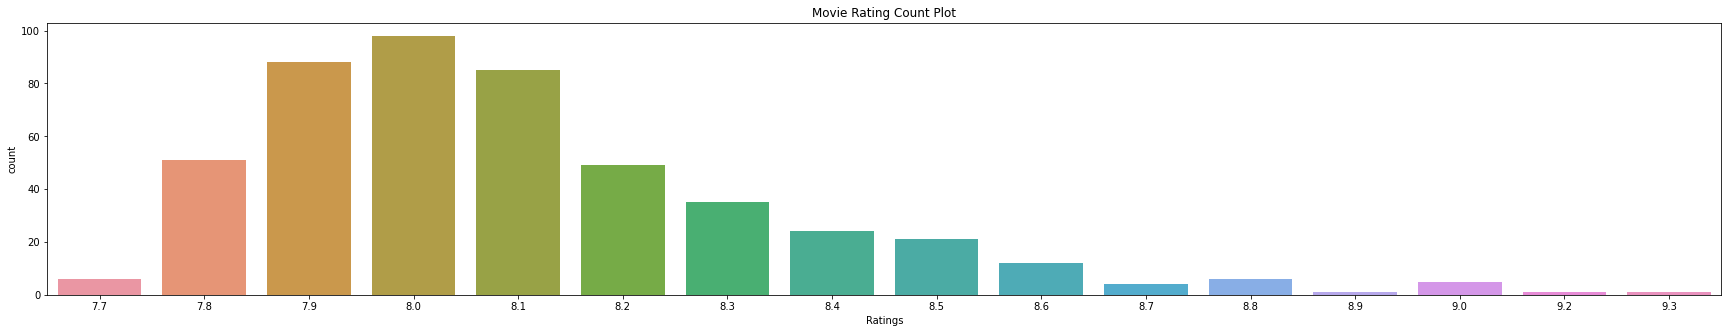

In [78]:
plt.figure(figsize=(30,5))
sns.countplot(data=final_df,x='Ratings')
plt.title('Movie Rating Count Plot');

### Categorical

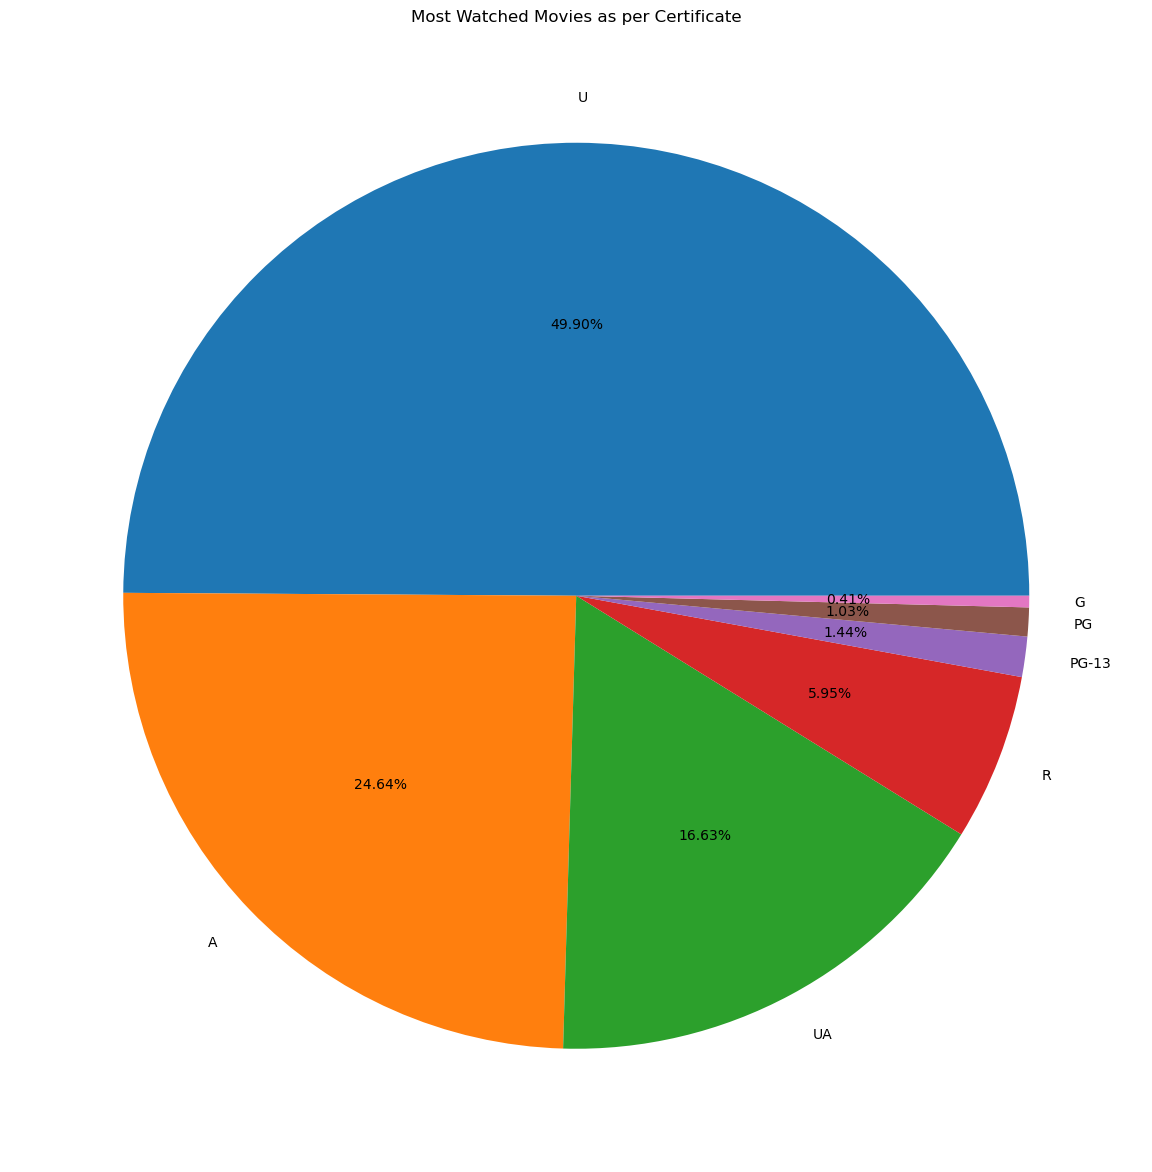

In [79]:
plt.figure(figsize=(25,15), dpi = 100)

plt.pie(final_df.Certificate.value_counts(),labels=final_df.Certificate.value_counts().index,autopct='%.2f%%' )
plt.title('Most Watched Movies as per Certificate');

### Categorical and Numerical

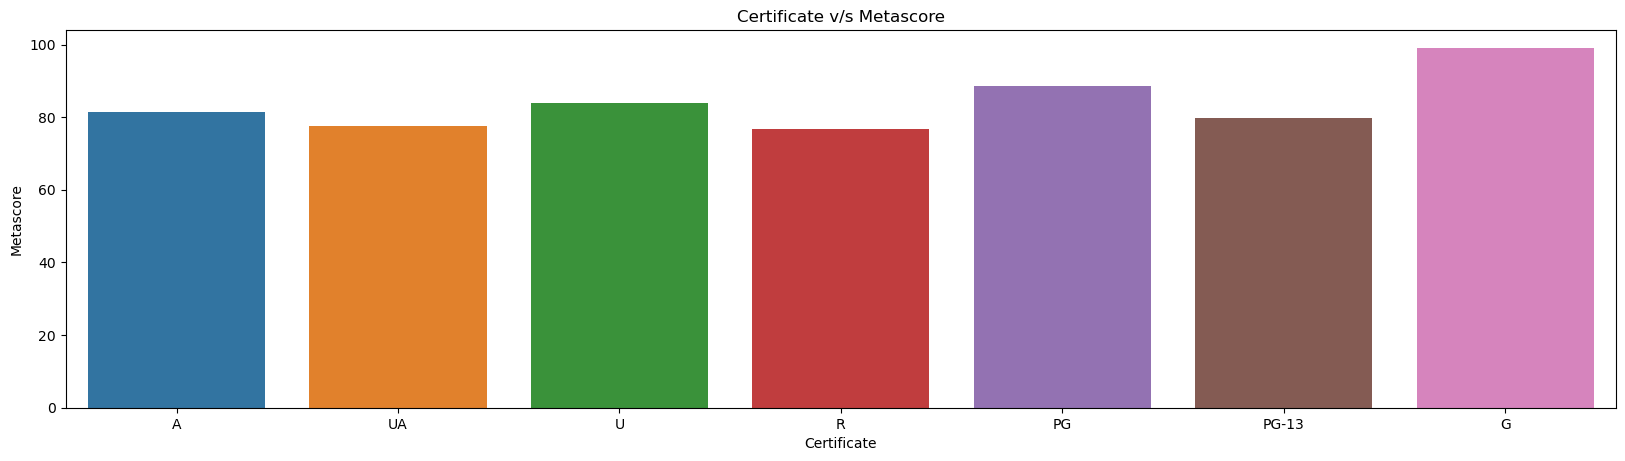

In [80]:
plt.figure(figsize=(20,5), dpi = 100)
sns.barplot(data=final_df,x='Certificate',y='Metascore',ci= None)
plt.title('Certificate v/s Metascore');

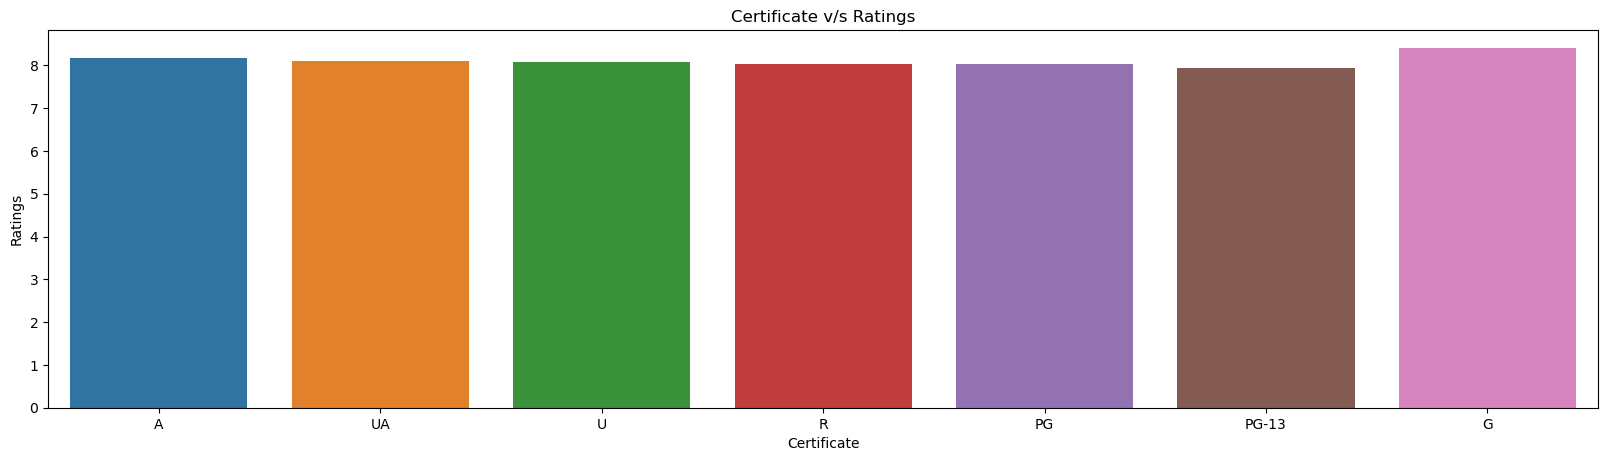

In [81]:
plt.figure(figsize=(20,5), dpi = 100)
sns.barplot(data=final_df,x='Certificate',y='Ratings',ci= None)
plt.title('Certificate v/s Ratings');

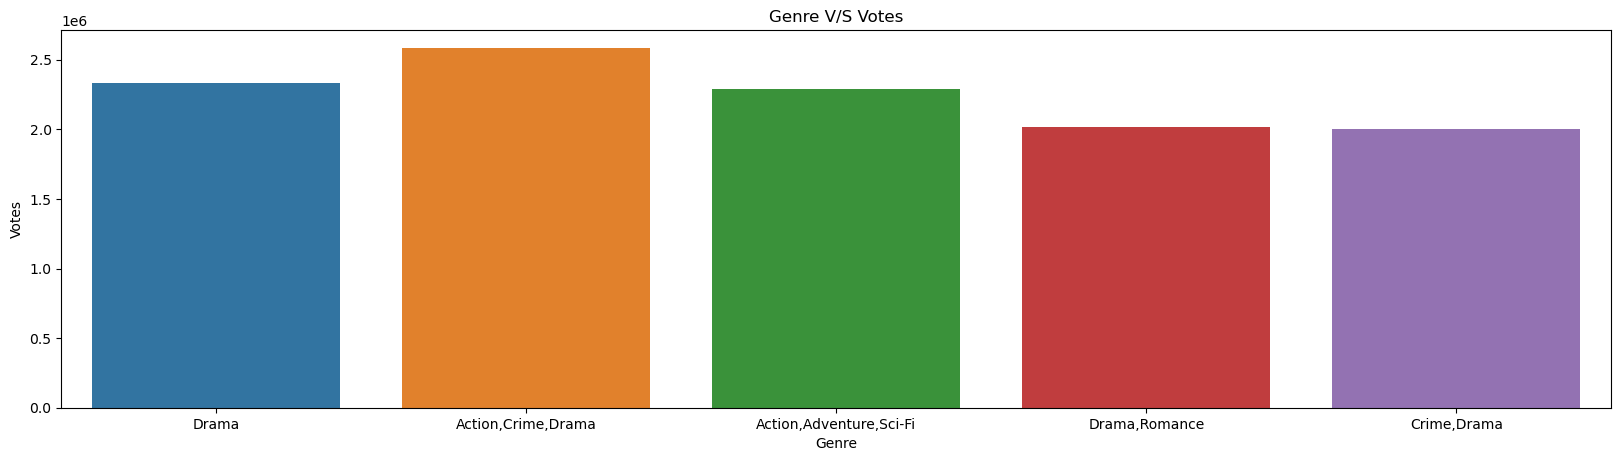

In [82]:
plt.figure(figsize=(20,5), dpi = 100)
sns.barplot(data=final_df,x=final_df.Genre[0:6],y='Votes',ci= None)
plt.title('Genre V/S Votes');

## Bivariate analysis

### Numerical & Numerical
#### Heat Map

In [83]:
final_df.corr()

Released_Year      Time   Ratings  Metascore     Votes  \
Released_Year       1.000000  0.151301  0.017762  -0.349537  0.396480   
Time                0.151301  1.000000  0.263782  -0.095707  0.229416   
Ratings             0.017762  0.263782  1.000000   0.074080  0.678044   
Metascore          -0.349537 -0.095707  0.074080   1.000000 -0.158601   
Votes               0.396480  0.229416  0.678044  -0.158601  1.000000   
Gross               0.352728  0.174560  0.253659  -0.135849  0.629733   
Page_No.           -0.066238 -0.180339 -0.831316  -0.001002 -0.498069   

                  Gross  Page_No.  
Released_Year  0.352728 -0.066238  
Time           0.174560 -0.180339  
Ratings        0.253659 -0.831316  
Metascore     -0.135849 -0.001002  
Votes          0.629733 -0.498069  
Gross          1.000000 -0.173955  
Page_No.      -0.173955  1.000000

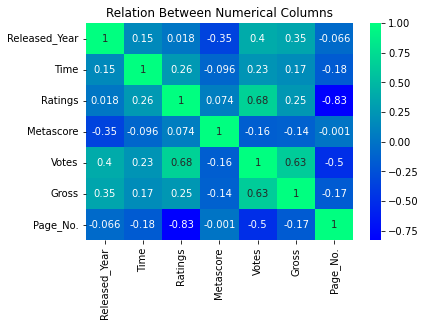

In [84]:
sns.heatmap(final_df.corr(),cmap= 'winter',annot=True)
plt.title('Relation Between Numerical Columns');

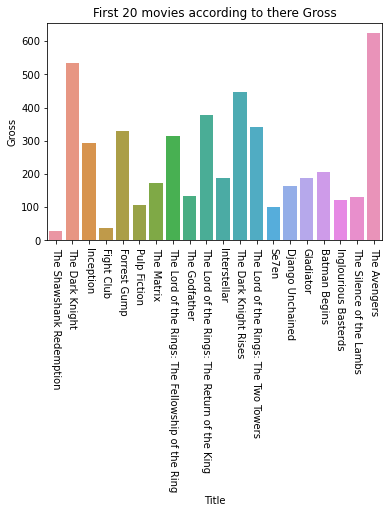

In [85]:
plt.xticks(rotation=270)
sns.barplot(data = final_df,x=final_df.Title[0:20],y=final_df.Gross[0:20])
plt.title('First 20 movies according to there Gross');

## Multivariate

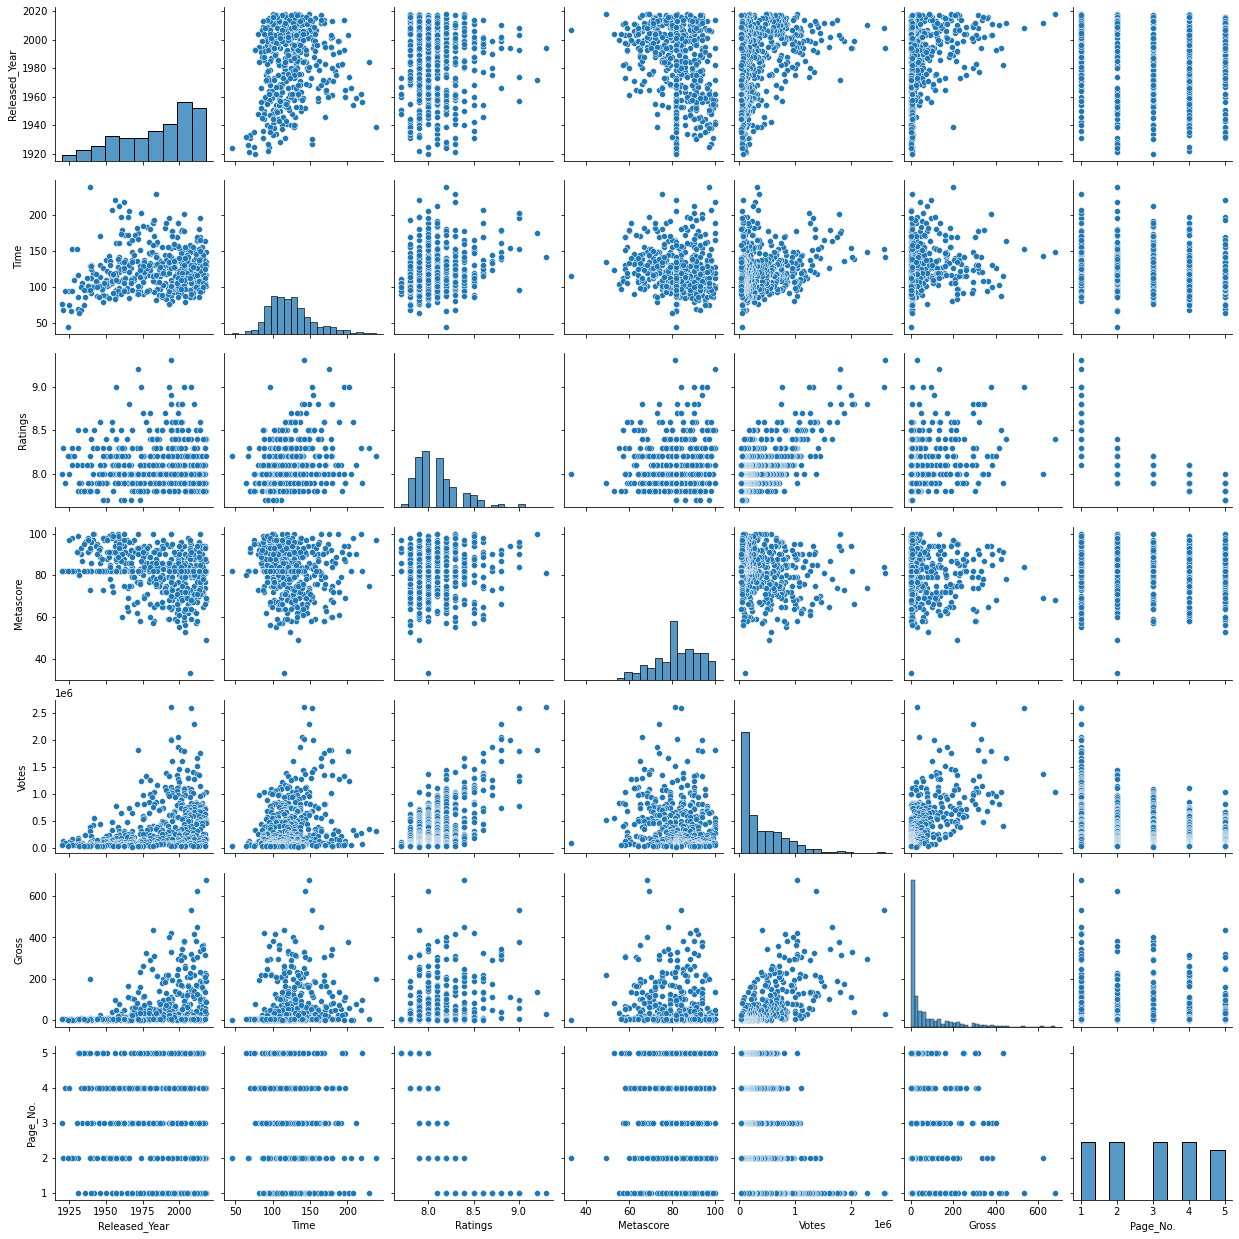

In [86]:
sns.pairplot(data=final_df);

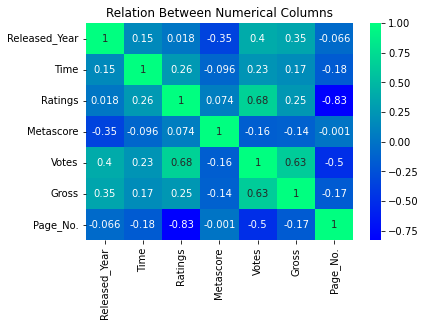

In [88]:
sns.heatmap(final_df.corr(),cmap= 'winter',annot=True)
plt.title('Relation Between Numerical Columns');